# Linear Models

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/CodeOp-tech/DA-ML-regression-predictive/master/datasets/scores_synth.csv?token=AHM3F3AXEA6FMNHMZGL3TH3APGLKC")
print(data.shape)
data

(1000, 3)


,income,score,internet_connection
0,69.454075,635.305372,1
1,47.632800,743.301322,1
2,22.905094,673.037833,1
3,4.465032,442.894112,0
4,19.360381,627.178633,1
...,...,...,...
995,8.801915,464.993872,0
996,15.317348,641.288260,1
997,25.411924,641.858088,1
998,4.898013,447.408180,0


Text(0.5, 0, 'income (in 1k euros)')

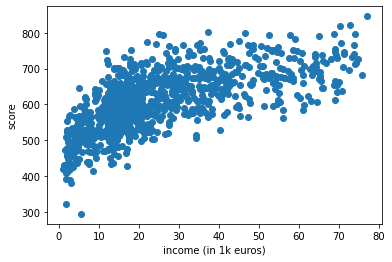

In [3]:
plt.scatter(data['income'], data['score'])
plt.ylabel('score')
plt.xlabel('income (in 1k euros)')

#### Cross validation

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['income']], data['score'], test_size=0.4, shuffle=True)

In [76]:
pd.concat([X_train,y_train],axis=1)

,income,score
529,32.969951,651.533089
817,10.390175,508.754831
785,31.046529,658.628103
448,15.565252,630.845425
272,17.638121,665.883017
...,...,...
734,27.418432,543.457980
48,2.753050,389.284897
933,4.009164,534.540681
44,4.401732,441.403563


In [77]:
pd.concat([X_test,y_test],axis=1)

,income,score
566,7.750278,467.822304
93,20.524021,528.574973
429,5.170637,495.140852
646,27.149281,715.154507
902,14.549653,502.058216
...,...,...
228,15.073813,680.539884
788,0.893344,420.668986
521,41.127580,686.023948
293,13.178657,544.461675


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


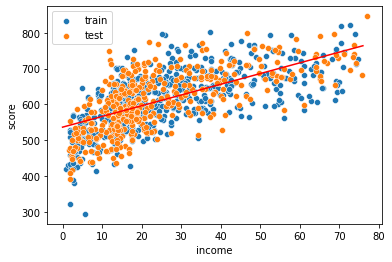

In [8]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
y_hat = lr.intercept_ + lr.coef_[0]*x_range
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

#### MSE: mean squared error

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
lr.predict(X_test)
losses = {}
losses['Linear'] = mean_squared_error(y_test, lr.predict(X_test))
print(losses)

{'Linear': 3561.4264874096807}


## Polynomials

$$y = a + b1\times\text{income} + b2\times{income}^2 + \epsilon$$

In [21]:
data['income2'] = data['income']**2
X_train, X_test, y_train, y_test = train_test_split(data[['income','income2']], data['score'], test_size=0.4, shuffle=True)

In [22]:
pd.concat([X_train,y_train],axis=1)

,income,income2,score
9,65.467582,4286.004260,665.284262
890,44.753197,2002.848620,599.500553
435,36.138484,1305.990042,585.181409
133,44.152285,1949.424281,592.441866
762,17.970550,322.940665,655.512374
...,...,...,...
62,17.204585,295.997756,568.618457
483,14.095849,198.692971,634.223591
171,43.852883,1923.075357,662.280165
735,15.526524,241.072960,530.203672


In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [24]:
lr.predict(X_test)
losses['Linear: polynomial2'] = mean_squared_error(y_test, lr.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3561.4264874096807
Linear: polynomial2  :  3484.6409436382346


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


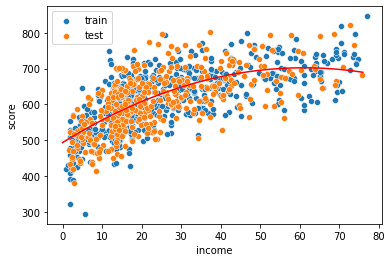

In [88]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max())
y_hat = lr.intercept_ + lr.coef_[0]*x_range + lr.coef_[1]*(x_range**2)
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

Linear  :  3561.4264874096807
Linear: polynomial2  :  3484.6409436382346
Linear: polynomial3  :  3472.5276405047834


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


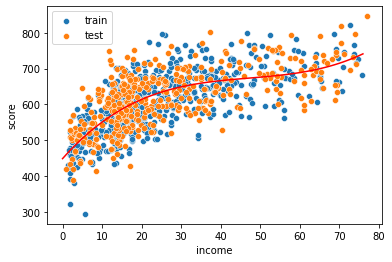

In [25]:
data['income3'] = data['income']**3
X_train, X_test, y_train, y_test = train_test_split(data[['income','income2','income3']], data['score'], test_size=0.4, shuffle=True)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
    
y_hat = lr.intercept_ + lr.coef_[0]*x_range + lr.coef_[1]*(x_range**2) + lr.coef_[2]*(x_range**3)
sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(y_hat, color='r')
plt.legend()

In [26]:
losses['Linear: polynomial3'] = mean_squared_error(y_test, lr.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3561.4264874096807
Linear: polynomial2  :  3484.6409436382346
Linear: polynomial3  :  3472.5276405047834


# Nonlinear Models

So far we've only seen linear models, but there are many different families of models in Machine Learning. Some of them are:
- Distance/clustering methods: K-Nearest-Neighbors (KNN).
- Kernel methods: Support Vector Machines (SVM).
- Decision-tree-based methods: Decision trees, random forests...
- Gradient-boosting methods: XGBoost, LightGBM, CatBoost...
- Neural networks

We will talk about KNN and SVM in the next class. 

## Tree

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['income']], data['score'], test_size=0.4, shuffle=True)

In [37]:
from sklearn.tree import DecisionTreeRegressor
cart = DecisionTreeRegressor()
cart.fit(X_train[['income']], y_train)

DecisionTreeRegressor()

In [38]:
losses['Tree'] = mean_squared_error(y_test, cart.predict(X_test[['income']]))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3561.4264874096807
Linear: polynomial2  :  3484.6409436382346
Linear: polynomial3  :  3472.5276405047834
Tree  :  6821.663042316617
Tree: max2  :  3735.5992077388846


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


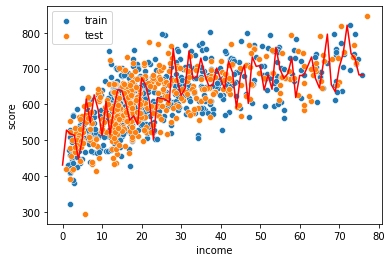

In [39]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)

sns.scatterplot(X_train['income'], y_train, label='train')
sns.scatterplot(X_test['income'], y_test, label='test')
plt.plot(cart.predict(x_range), color='r')

In [32]:
cart = DecisionTreeRegressor(max_depth=2)
cart.fit(X_train[['income']], y_train)

DecisionTreeRegressor(max_depth=2)

In [33]:
losses['Tree: max2'] = mean_squared_error(y_test, cart.predict(X_test[['income']]))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3561.4264874096807
Linear: polynomial2  :  3484.6409436382346
Linear: polynomial3  :  3472.5276405047834
Tree  :  6122.00357493835
Tree: max2  :  3735.5992077388846


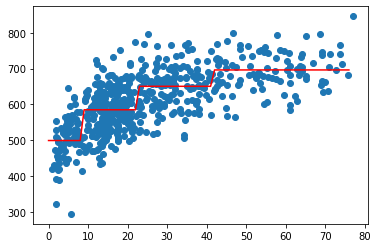

In [34]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(cart.predict(x_range), color='r')

## Random Forest
Pleas read about [hypterparameters](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/)

In [46]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
losses['Random Forest'] = mean_squared_error(y_test, rf.predict(X_test[['income']]))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3561.4264874096807
Linear: polynomial2  :  3484.6409436382346
Linear: polynomial3  :  3472.5276405047834
Tree  :  6821.663042316617
Tree: max2  :  3735.5992077388846
Random Forest: max2  :  3446.6042517318524
Random Forest  :  4826.193450697317


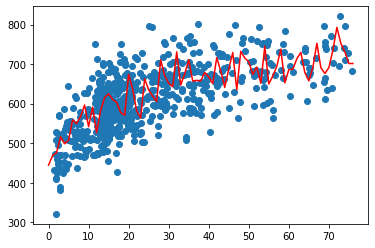

In [48]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')

In [49]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2)

In [50]:
losses['Random Forest: max2'] = mean_squared_error(y_test, rf.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3561.4264874096807
Linear: polynomial2  :  3484.6409436382346
Linear: polynomial3  :  3472.5276405047834
Tree  :  6821.663042316617
Tree: max2  :  3735.5992077388846
Random Forest: max2  :  3444.6220381992694
Random Forest  :  4826.193450697317


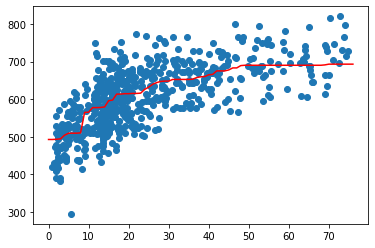

In [125]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')

## XGBoost

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data.

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

[Further reading](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/)

In [56]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
losses['XGBoost'] = mean_squared_error(y_test, xgb.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3561.4264874096807
Linear: polynomial2  :  3484.6409436382346
Linear: polynomial3  :  3472.5276405047834
Tree  :  6821.663042316617
Tree: max2  :  3735.5992077388846
Random Forest: max2  :  3444.6220381992694
Random Forest  :  4826.193450697317
XGBoost  :  4961.344364170622


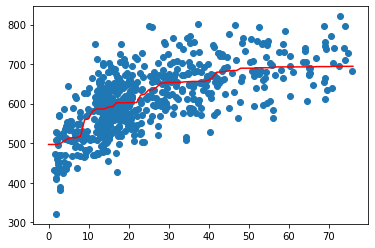

In [54]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')

Let's play around with some [parameters](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/) to improve the results.

In [57]:
xgb = XGBRegressor(max_depth=2)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
losses['XGBoost: max2'] = mean_squared_error(y_test, xgb.predict(X_test))
for key, value in losses.items():
    print(key, ' : ', value)

Linear  :  3561.4264874096807
Linear: polynomial2  :  3484.6409436382346
Linear: polynomial3  :  3472.5276405047834
Tree  :  6821.663042316617
Tree: max2  :  3735.5992077388846
Random Forest: max2  :  3444.6220381992694
Random Forest  :  4826.193450697317
XGBoost  :  4961.344364170622
XGBoost: max2  :  3772.8892204623994


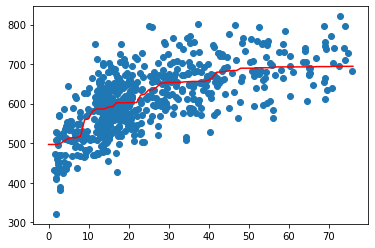

In [59]:
x_range = np.arange(start=data['income'].min(),stop=data['income'].max()).reshape(-1, 1)
plt.scatter(X_train['income'], y_train)
plt.plot(rf.predict(x_range), color='r')